Objective: Study the trend of Urbanization in Australia & Canada

Major Steps Involved:
    
    1. Data Concatenation
    2. Missing Value Imputation
    3. Time-Lag Correlation Study
    4. Australia vs Canda on [Economy, Health, Employment]

In [1]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fancyimpute import SoftImpute
from datetime import datetime
# from impyute.utils import mcar_test
# from impyute.imputations.ts import arima, locf
from scipy.stats import spearmanr, pearsonr, linregress

%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

C:\Users\Jaskaran\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Import country data & filter "Australia" & "Canada"

In [ ]:
df_country=pd.read_csv('WDICountry.csv')
df_country=df_country[['Country Code','Region']]

df_country.head()

Perform merge with Series data to get list of all series for each of the countries

In [ ]:
df_country_series=pd.read_csv('WDICountry-Series.csv')
df_country_series=pd.merge(df_country_series, df_country, left_on='CountryCode', right_on='Country Code')
df_country_series.drop(['Country Code','DESCRIPTION'], axis=1, inplace=True)
df_country_series.head()

Perform merge with current data and Series information

In [ ]:
df_series=pd.read_csv('WDISeries.csv')
df_series=df_series[['Series Code','Topic','Indicator Name']]

df_country_series=pd.merge(df_country_series, df_series, left_on='SeriesCode', right_on='Series Code')
df_country_series.drop(['Series Code'], axis=1, inplace=True)
df_country_series.head()

Finally, merge the data to get values for all the indicators for all the years untill 2017

In [ ]:
df_wdi_data=pd.read_csv('WDIData.csv')
df_wdi_data=df_wdi_data[['Country Code','Indicator Code','1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017']]

df=pd.merge(df_wdi_data, df_country_series, left_on=['Country Code','Indicator Code'], right_on=['CountryCode','SeriesCode'])
df.drop(['CountryCode','SeriesCode'], axis=1, inplace=True)

df.head()

# Imputation

As we can see there are some missing values in our data, we first need to see what is the nature of this missing data
1. MAR
2. MCAR
3. MNAR

From a simple glimpse we can say that there's no pattern to this missing data and is probably a case of MCAR. However, to confirm our assumption we can use the "Little's MCAR Test".

According to Little's MCAR Test: 
Take the mean of the data with missing values and take the mean of the data without missing values. If they’re the same/simlar, then it’s more likely that your data is MCAR.

In [ ]:
mcar_test.mcar_test(df[['1960', '1961', '1962', '1963',
       '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972',
       '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']].values)

Now, we can conclude that our data has MCAR values

Prepare data for imputation

In [ ]:
df_for_impute=df[['Country Code', 'Indicator Code', '1960', '1961', '1962', '1963',
       '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972',
       '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']]

We need to make sure we impute data for both countries separately as the values are not related in any way and so we don't want it to affect the new values either

To impute values, we'll be using SoftImpute Algorithm which is an iterative method for completing a matrix using SVD

In [ ]:
df_for_impute=df_for_impute[df_for_impute['Country Code']=='AUS']

X_filled_nnm = SoftImpute().complete(df_for_impute.drop(['Country Code','Indicator Code'], axis=1))

df_for_impute_aus=pd.DataFrame(X_filled_nnm, columns=['1960', '1961', '1962', '1963',
       '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972',
       '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'])

Imputed data for Australia

In [ ]:
df_for_impute_aus.head()

Imputing for Canada

In [ ]:
df_for_impute=df[['Country Code', 'Indicator Code', '1960', '1961', '1962', '1963',
       '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972',
       '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']]

In [ ]:
df_for_impute=df_for_impute[df_for_impute['Country Code']=='CAN']

X_filled_nnm = SoftImpute().complete(df_for_impute.drop(['Country Code','Indicator Code'], axis=1))

df_for_impute_can=pd.DataFrame(X_filled_nnm, columns=['1960', '1961', '1962', '1963',
       '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972',
       '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'])

Imputed data for Canada

In [ ]:
df_for_impute_can.head()

# Replace Imputed Data in Original Matrix

In [ ]:
df_imputed=pd.concat([df_for_impute_aus, df_for_impute_can])

df.drop(['1960', '1961', '1962', '1963',
       '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972',
       '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'], axis=1, inplace=True)

df_imputed[['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017']]=df_imputed[['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017']].apply(lambda x:np.round(x,2), axis=1)

Output Files

In [ ]:
df_imputed.to_csv('imputed.csv', index=False)

In [ ]:
df.to_csv('data.csv', index=False)

# EDA: Australia vs Canada on Multiple Indicators

In [46]:
df=pd.read_csv('data_aus_can_wdi.csv')
df=pd.melt(df, id_vars=['Country Code','Indicator Name'], var_name='Year', value_name='Value')

df_aus=df[df['Country Code']=='AUS']
df_aus.drop(['Country Code'], axis=1, inplace=True)
df_aus=df_aus.pivot_table(values='Value', index='Year', columns='Indicator Name')
df_aus.reset_index(inplace=True)

df_can=df[df['Country Code']=='CAN']
df_can.drop(['Country Code'], axis=1, inplace=True)
df_can=df_can.pivot_table(values='Value', index='Year', columns='Indicator Name')
df_can.reset_index(inplace=True)

C:\Users\Jaskaran\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


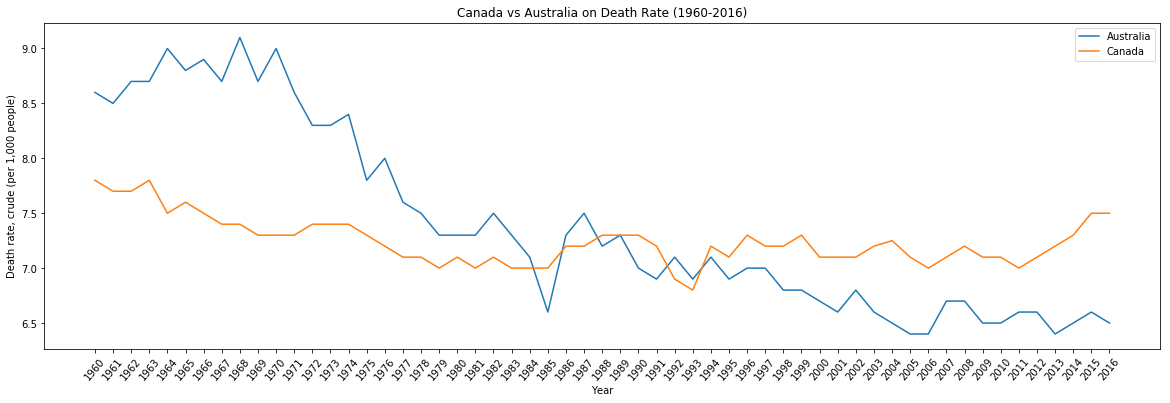

In [62]:
plt.figure(figsize=(20,6))
sns.lineplot(x=df_aus['Year'][:-1], y=df_aus['Death rate, crude (per 1,000 people)'], label='Australia')
sns.lineplot(x=df_can['Year'][:-1], y=df_can['Death rate, crude (per 1,000 people)'], label='Canada')
plt.xticks(rotation=50)
plt.title('Canada vs Australia on Death Rate (1960-2016)')
plt.legend()
plt.show()

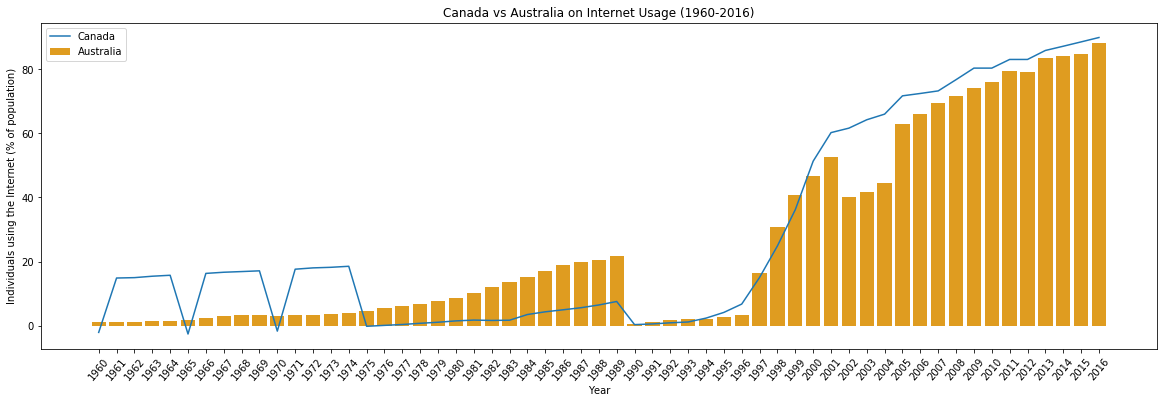

In [67]:
plt.figure(figsize=(20,6))
sns.barplot(x=df_aus['Year'][:-1], y=df_aus['Individuals using the Internet (% of population)'], label='Australia', color='orange', saturation=0.75)
sns.lineplot(x=df_can['Year'][:-1], y=df_can['Individuals using the Internet (% of population)'], label='Canada')
plt.xticks(rotation=50)
plt.title('Canada vs Australia on Internet Usage (1960-2016)')
plt.legend()
plt.show()

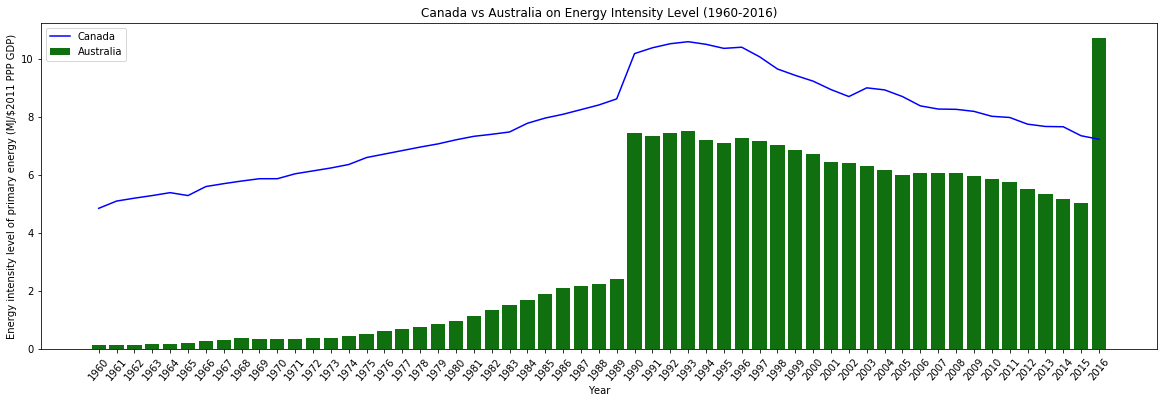

In [68]:
plt.figure(figsize=(20,6))
sns.barplot(x=df_aus['Year'][:-1], y=df_aus['Energy intensity level of primary energy (MJ/$2011 PPP GDP)'], label='Australia', color='green')
sns.lineplot(x=df_can['Year'][:-1], y=df_can['Energy intensity level of primary energy (MJ/$2011 PPP GDP)'], label='Canada', color='blue')
plt.xticks(rotation=50)
plt.title('Canada vs Australia on Energy Intensity Level (1960-2016)')
plt.legend()
plt.show()

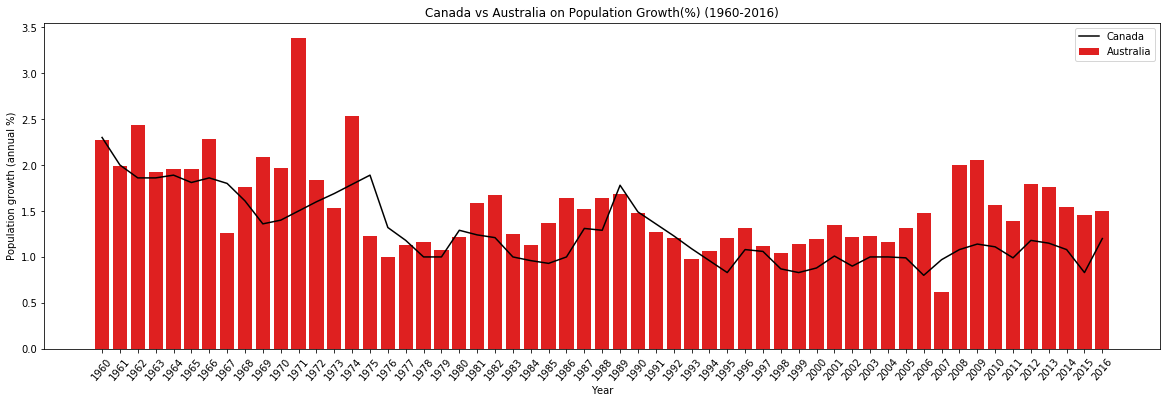

In [91]:
plt.figure(figsize=(20,6))
sns.barplot(x=df_aus['Year'][:-1], y=df_aus['Population growth (annual %)'], label='Australia', color='red')
sns.lineplot(x=df_can['Year'][:-1], y=df_can['Population growth (annual %)'], label='Canada', color='black')
plt.xticks(rotation=50)
plt.title('Canada vs Australia on Population Growth(%) (1960-2016)')
plt.legend()
plt.show()

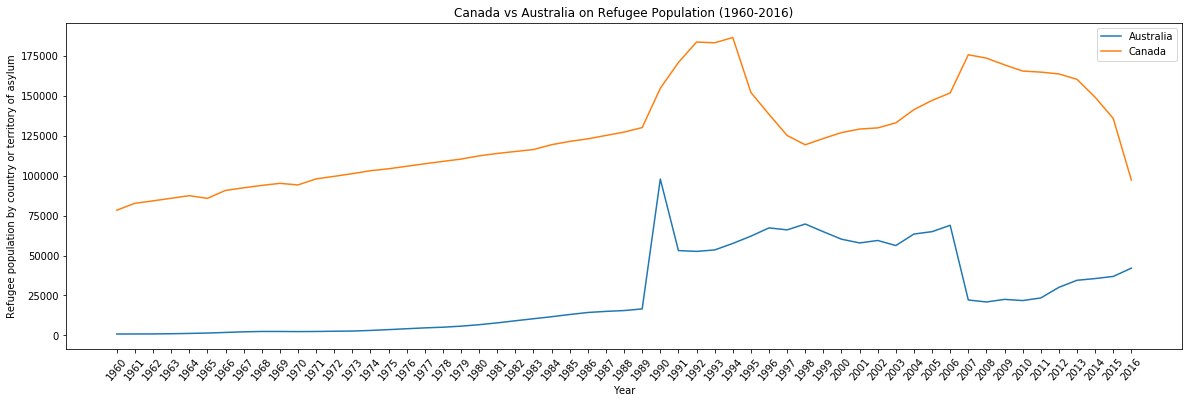

In [81]:
plt.figure(figsize=(20,6))
sns.lineplot(x=df_aus['Year'][:-1], y=df_aus['Refugee population by country or territory of asylum'], label='Australia')
sns.lineplot(x=df_can['Year'][:-1], y=df_can['Refugee population by country or territory of asylum'], label='Canada')
plt.xticks(rotation=50)
plt.title('Canada vs Australia on Refugee Population (1960-2016)')
plt.legend()
plt.show()

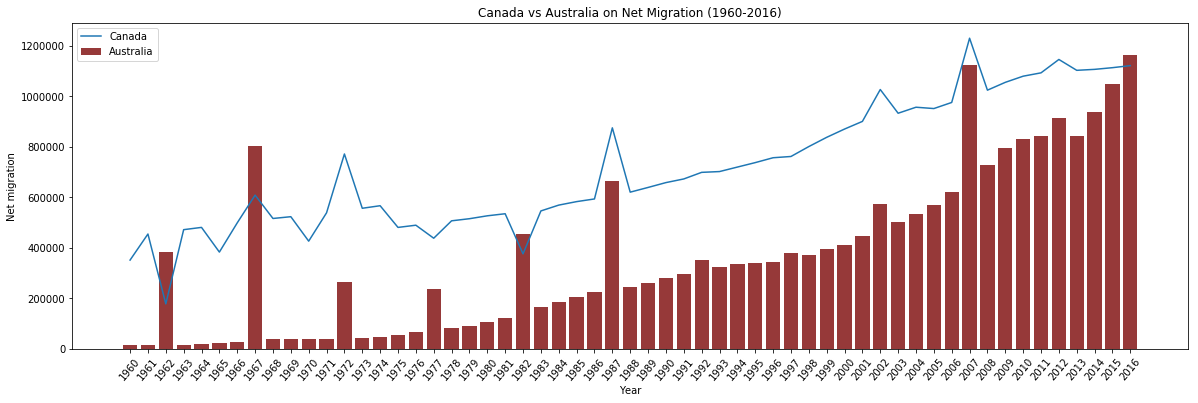

In [95]:
plt.figure(figsize=(20,6))
sns.barplot(x=df_aus['Year'][:-1], y=df_aus['Net migration'], label='Australia', color='brown')
sns.lineplot(x=df_can['Year'][:-1], y=df_can['Net migration'], label='Canada')
plt.xticks(rotation=50)
plt.title('Canada vs Australia on Net Migration (1960-2016)')
plt.legend()
plt.show()

# Correlation Analysis

In [4]:
# Time-Lag Adjustment Function
def df_derived_by_shift(df,lag=0,NON_DER=[]):
    df = df.copy()
    if not lag:
        return df
    cols ={}
    for i in range(1,lag+1):
        for x in list(df.columns):
            if x not in NON_DER:
                if not x in cols:
                    cols[x] = ['{}_{}'.format(x, i)]
                else:
                    cols[x].append('{}_{}'.format(x, i))
    for k,v in cols.items():
        columns = v
        dfn = pd.DataFrame(data=None, columns=columns, index=df.index)    
        i = 1
        for c in columns:
            dfn[c] = df[k].shift(periods=i)
            i+=1
        df = pd.concat([df, dfn], axis=1, join_axes=[df.index])
    return df

# Time-Lag Correlation



# Analyzing Time-Lag Correlation for Australian Indicators

In [16]:
df=pd.read_csv('data_aus_can_wdi.csv')
df=pd.melt(df, id_vars=['Country Code','Indicator Name'], var_name='Year', value_name='Value')

df=df[df['Country Code']=='AUS']
df.drop(['Country Code'], axis=1, inplace=True)

df=df.pivot_table(values='Value', index='Year', columns='Indicator Name')
df.reset_index(inplace=True)

df.head()

Indicator Name,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Energy intensity level of primary energy (MJ/$2011 PPP GDP),"Fertility rate, total (births per woman)",Fixed broadband subscriptions,Fixed broadband subscriptions (per 100 people),Fixed telephone subscriptions,Fixed telephone subscriptions (per 100 people),Individuals using the Internet (% of population),"International migrant stock, total","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Military expenditure (current LCU),Mobile cellular subscriptions,Mobile cellular subscriptions (per 100 people),"Mortality rate, adult, female (per 1,000 female adults)","Mortality rate, adult, male (per 1,000 male adults)",Mothers are guaranteed an equivalent position after maternity leave (1=yes; 0=no),Net migration,Nondiscrimination clause mentions gender in the constitution (1=yes; 0=no),Population ages 0-14 (% of total),"Population ages 0-14, female (% of total)","Population ages 0-14, male (% of total)",Population ages 15-64 (% of total),"Population ages 15-64, female (% of total)","Population ages 15-64, male (% of total)",Population ages 65 and above (% of total),"Population ages 65 and above, female (% of total)","Population ages 65 and above, male (% of total)",Population growth (annual %),"Population, female (% of total)","Population, male (% of total)","Population, total",Refugee population by country or territory of asylum,Renewable electricity output (% of total electricity output),Renewable energy consumption (% of total final energy consumption),Sex ratio at birth (male births per female births),"Survival to age 65, female (% of cohort)","Survival to age 65, male (% of cohort)"
0,1960,44.83,22.4,8.6,0.12,3.45,78007.22,0.34,1561968.00,15.18,1.12,1698085.00,74.0,67.79,70.82,410500000.0,0.00,0.00,115.94,200.00,0.01,13446.51,0.0,30.19,29.78,30.59,61.23,60.36,62.09,8.58,9.86,7.32,2.27,49.48,50.52,10276477.0,854.15,0.20,0.16,0.02,80.40,67.24
1,1961,45.07,22.9,8.5,0.13,3.54,79907.36,0.35,198007.62,0.98,1.15,99922.96,74.2,67.90,70.97,420500000.0,328804.99,1.50,109.19,198.80,0.01,13774.05,0.0,30.26,29.83,30.69,61.14,60.26,62.01,8.60,9.92,7.30,1.99,49.51,50.49,10483000.0,874.96,0.21,0.17,0.02,80.54,67.23
2,1962,45.30,22.1,8.7,0.13,3.44,83042.81,0.37,205777.17,1.01,1.19,103843.80,74.2,67.84,70.94,437000000.0,341706.85,1.55,112.52,203.46,0.01,382989.00,0.0,30.17,29.71,30.62,61.22,60.32,62.11,8.61,9.97,7.27,2.44,49.55,50.45,10742000.0,909.29,0.21,0.17,1.06,80.69,67.23
3,1963,45.98,21.5,8.7,0.15,3.33,93874.24,0.41,232617.08,1.15,1.35,117388.35,74.2,67.78,70.91,494000000.0,386276.33,1.76,115.74,202.32,0.02,16181.60,0.0,29.98,29.50,30.45,61.41,60.48,62.32,8.61,10.01,7.23,1.92,49.58,50.42,10950000.0,1027.89,0.24,0.20,0.02,80.68,67.16
4,1964,46.65,20.5,9.0,0.18,3.15,111261.52,0.49,275702.14,1.36,1.60,139130.88,74.2,67.72,70.88,585500000.0,457821.99,2.08,118.40,209.65,0.02,19178.73,0.0,29.78,29.29,30.26,61.62,60.67,62.56,8.60,10.05,7.18,1.96,49.61,50.39,11167000.0,1218.28,0.29,0.23,0.02,80.67,67.09


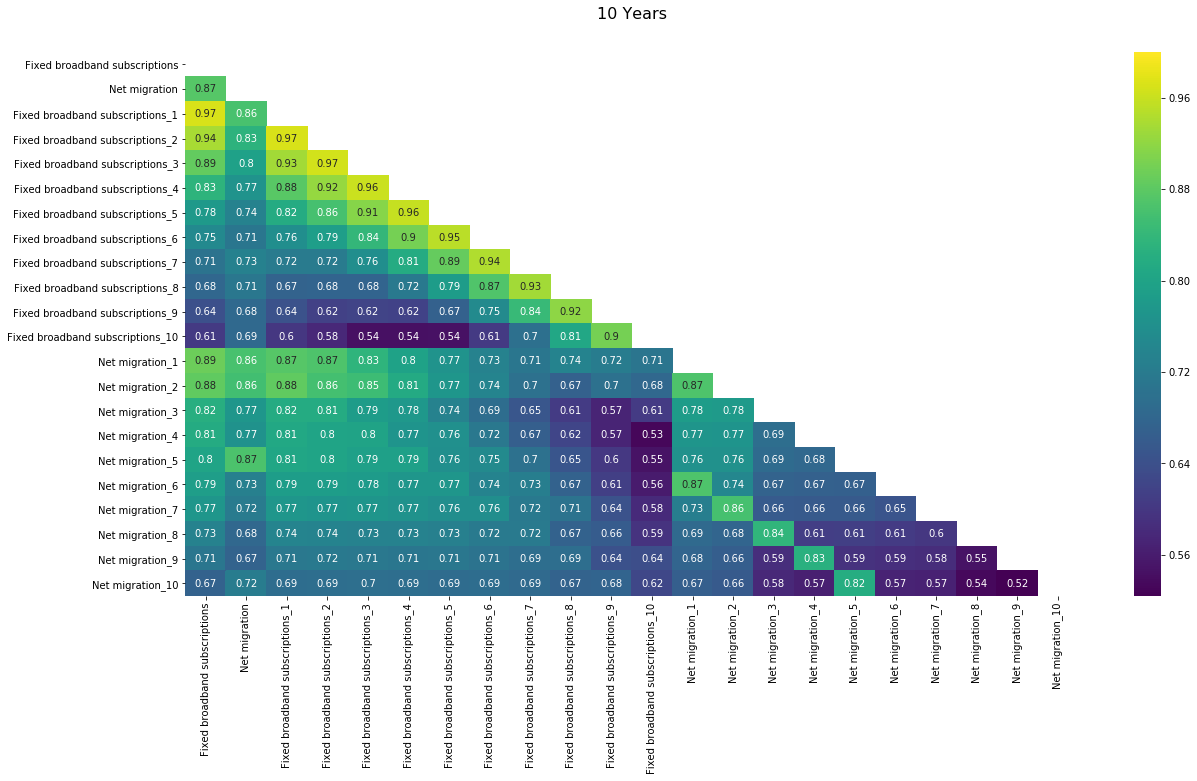

In [55]:
NON_DER = ['Year',]
df_new = df_derived_by_shift(df[['Fixed broadband subscriptions','Net migration']], 10, NON_DER)

df_new = df_new.dropna()

colormap = plt.cm.RdBu
plt.figure(figsize=(20,10))
plt.title(u'10 Years', y=1.05, size=16)

mask = np.zeros_like(df_new.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(df_new.corr(), mask=mask, cmap='viridis', annot=True)

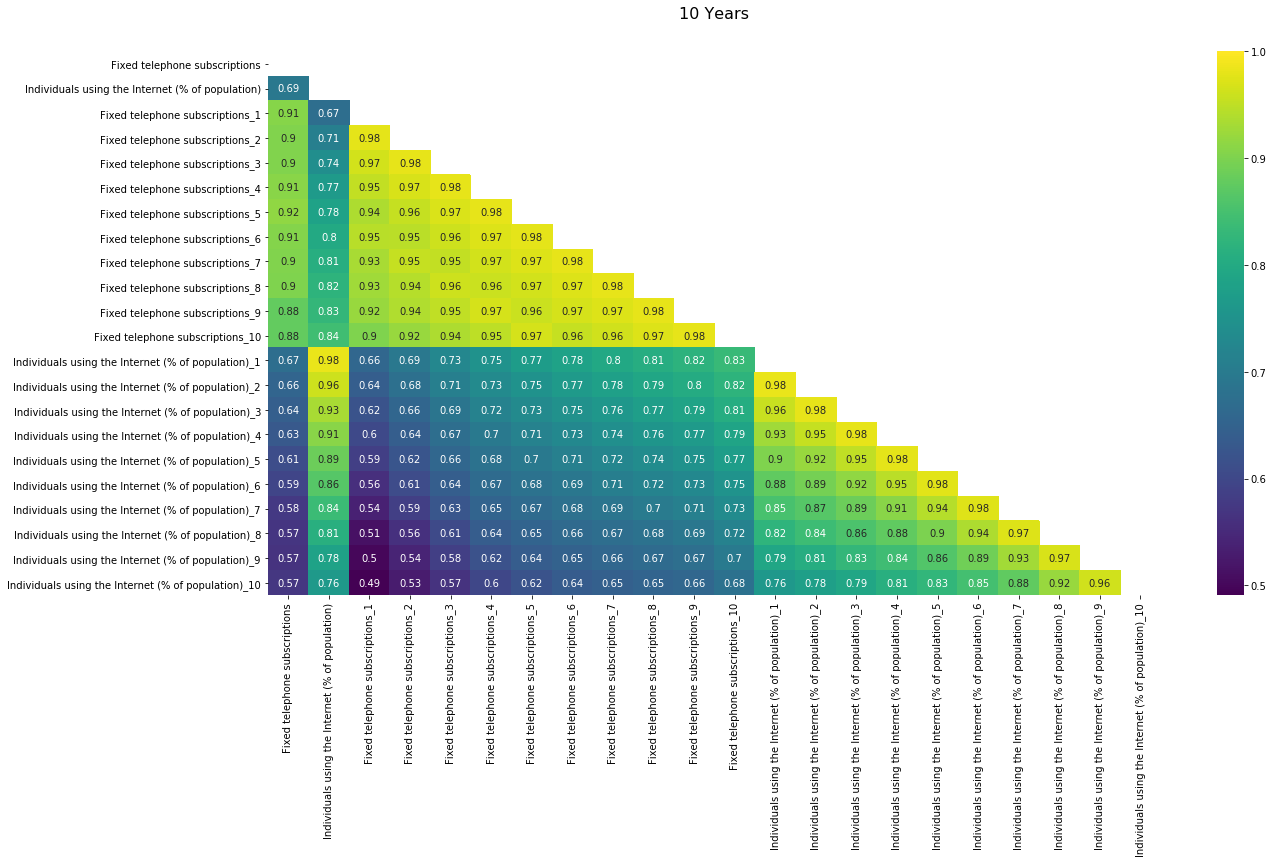

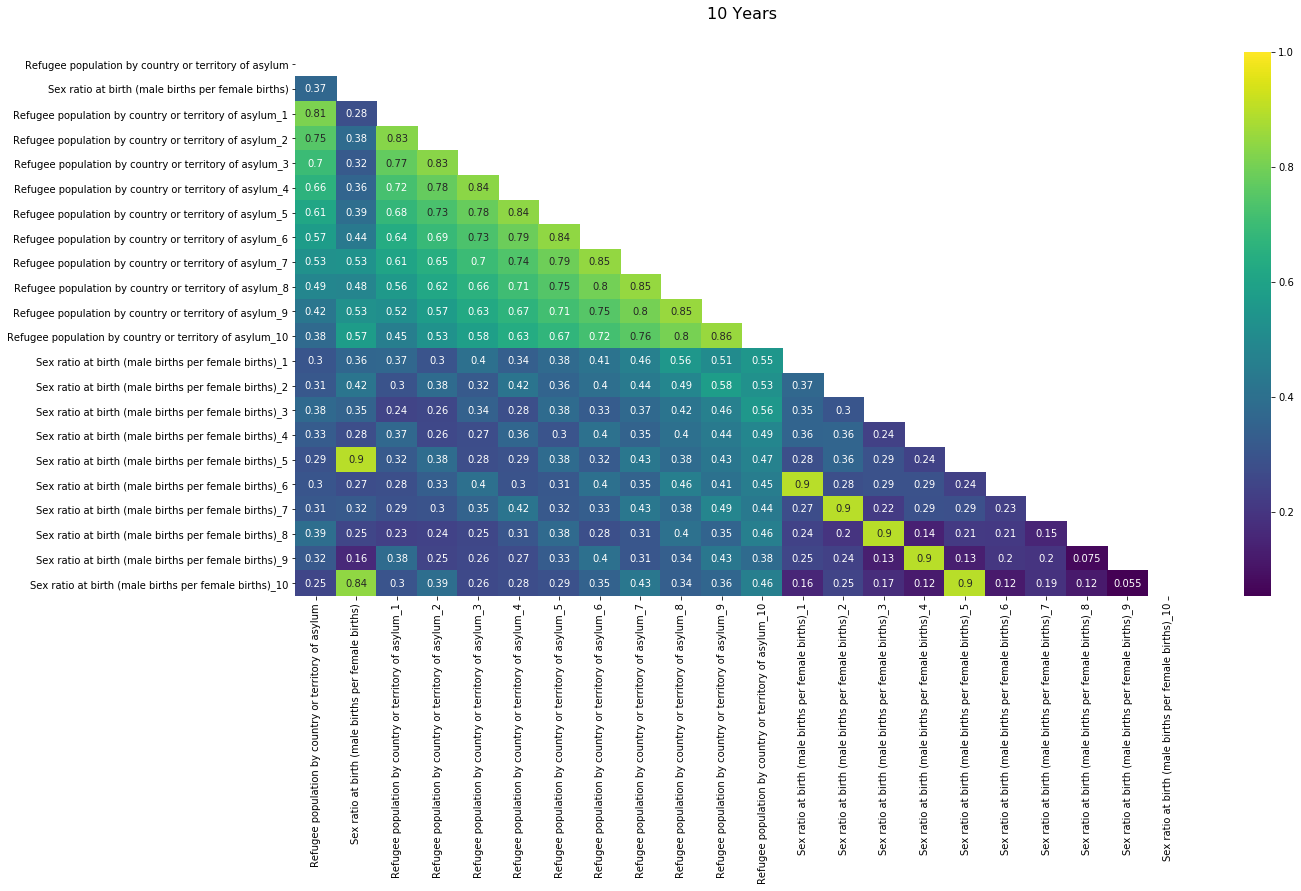

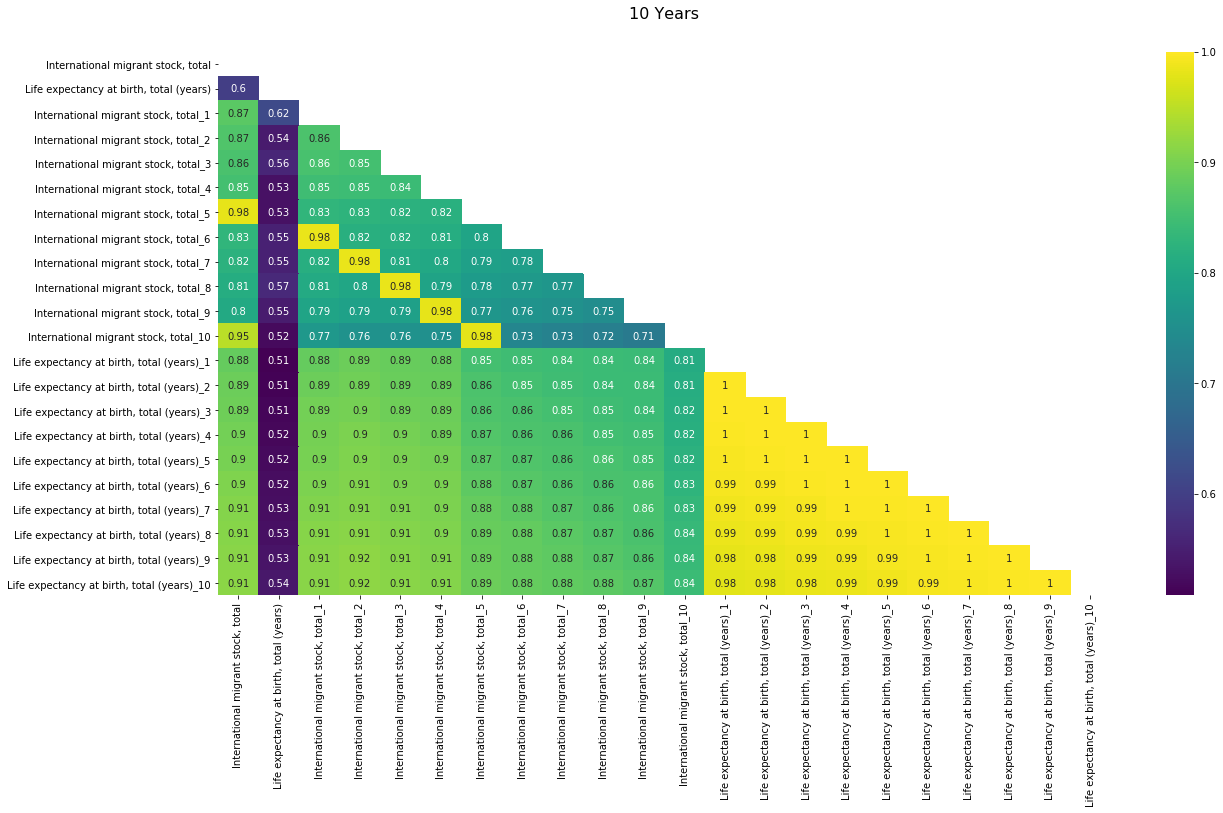

In [17]:
NON_DER = ['Year',]
df_new = df_derived_by_shift(df[['International migrant stock, total','Life expectancy at birth, total (years)']], 10, NON_DER)

df_new = df_new.dropna()

colormap = plt.cm.RdBu
plt.figure(figsize=(20,10))
plt.title(u'10 Years', y=1.05, size=16)

mask = np.zeros_like(df_new.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(df_new.corr(), mask=mask, cmap='viridis', annot=True)

# Analyzing Time-Lag Correlation for Canadian Indicators

In [19]:
df=pd.read_csv('data_aus_can_wdi.csv')
df=pd.melt(df, id_vars=['Country Code','Indicator Name'], var_name='Year', value_name='Value')

df=df[df['Country Code']=='CAN']
df.drop(['Country Code'], axis=1, inplace=True)

df=df.pivot_table(values='Value', index='Year', columns='Indicator Name')
df.reset_index(inplace=True)

df.head()

Indicator Name,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Energy intensity level of primary energy (MJ/$2011 PPP GDP),"Fertility rate, total (births per woman)",Fixed broadband subscriptions,Fixed broadband subscriptions (per 100 people),Fixed telephone subscriptions,Fixed telephone subscriptions (per 100 people),Individuals using the Internet (% of population),"International migrant stock, total","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Mobile cellular subscriptions,Mobile cellular subscriptions (per 100 people),"Mortality rate, adult, female (per 1,000 female adults)","Mortality rate, adult, male (per 1,000 male adults)",Net migration,Population growth (annual %),"Population, total",Rail lines (total route-km),Refugee population by country or territory of asylum,Renewable electricity output (% of total electricity output),Renewable energy consumption (% of total final energy consumption),"Stocks traded, turnover ratio of domestic shares (%)"
0,1960,26.7,7.8,4.84,3.81,1024645.75,2.96,4987502.00,27.84,-2.07,2766304.00,74.15,68.26,71.13,0.00,0.00,109.68,192.90,351424.28,2.30,17909009.0,29555.20,78415.61,29.45,10.33,2.61
1,1961,26.0,7.7,5.09,3.75,1991800.50,5.97,8635591.48,30.42,14.88,2842058.91,74.45,68.39,71.35,4263875.69,12.58,106.48,190.74,454612.20,2.00,18271000.0,30584.43,82727.43,32.79,11.65,18.89
2,1962,25.2,7.7,5.19,3.68,2016276.85,6.04,8777792.10,30.96,15.00,2891616.49,74.43,68.45,71.37,4302393.18,12.69,108.11,191.18,178066.00,1.86,18614000.0,31152.18,84252.81,33.38,11.86,19.11
3,1963,24.6,7.8,5.28,3.61,2067347.42,6.20,8963130.47,31.57,15.44,2949855.24,74.50,68.41,71.38,4425600.05,13.05,106.71,191.78,471855.17,1.86,18964000.0,31744.47,85865.20,34.04,12.09,19.61
4,1964,23.4,7.5,5.38,3.46,2106701.59,6.31,9133753.23,32.17,15.74,3006008.89,75.08,68.63,71.78,4509846.08,13.30,104.39,191.41,480837.44,1.89,19325000.0,32348.76,87499.73,34.68,12.32,19.98


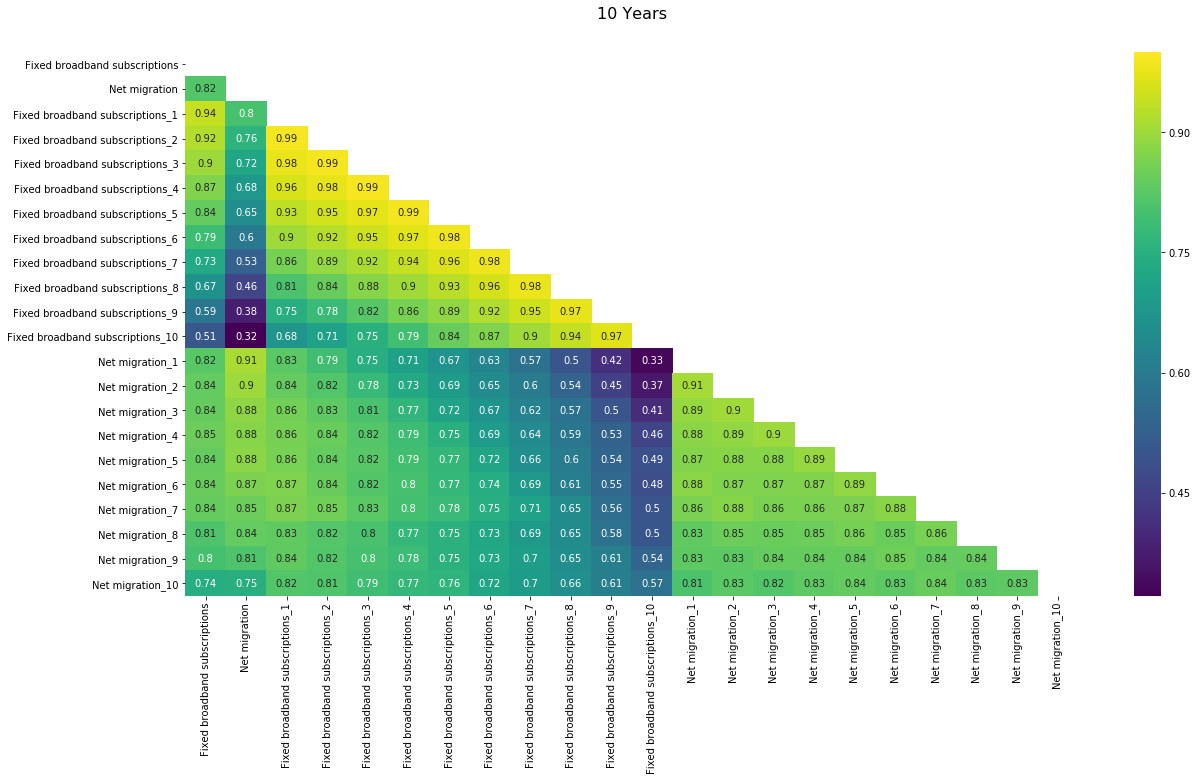

In [8]:
NON_DER = ['Year',]
df_new = df_derived_by_shift(df[['Fixed broadband subscriptions','Net migration']], 10, NON_DER)

df_new = df_new.dropna()

colormap = plt.cm.RdBu
plt.figure(figsize=(20,10))
plt.title(u'10 Years', y=1.05, size=16)

mask = np.zeros_like(df_new.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(df_new.corr(), mask=mask, cmap='viridis', annot=True)

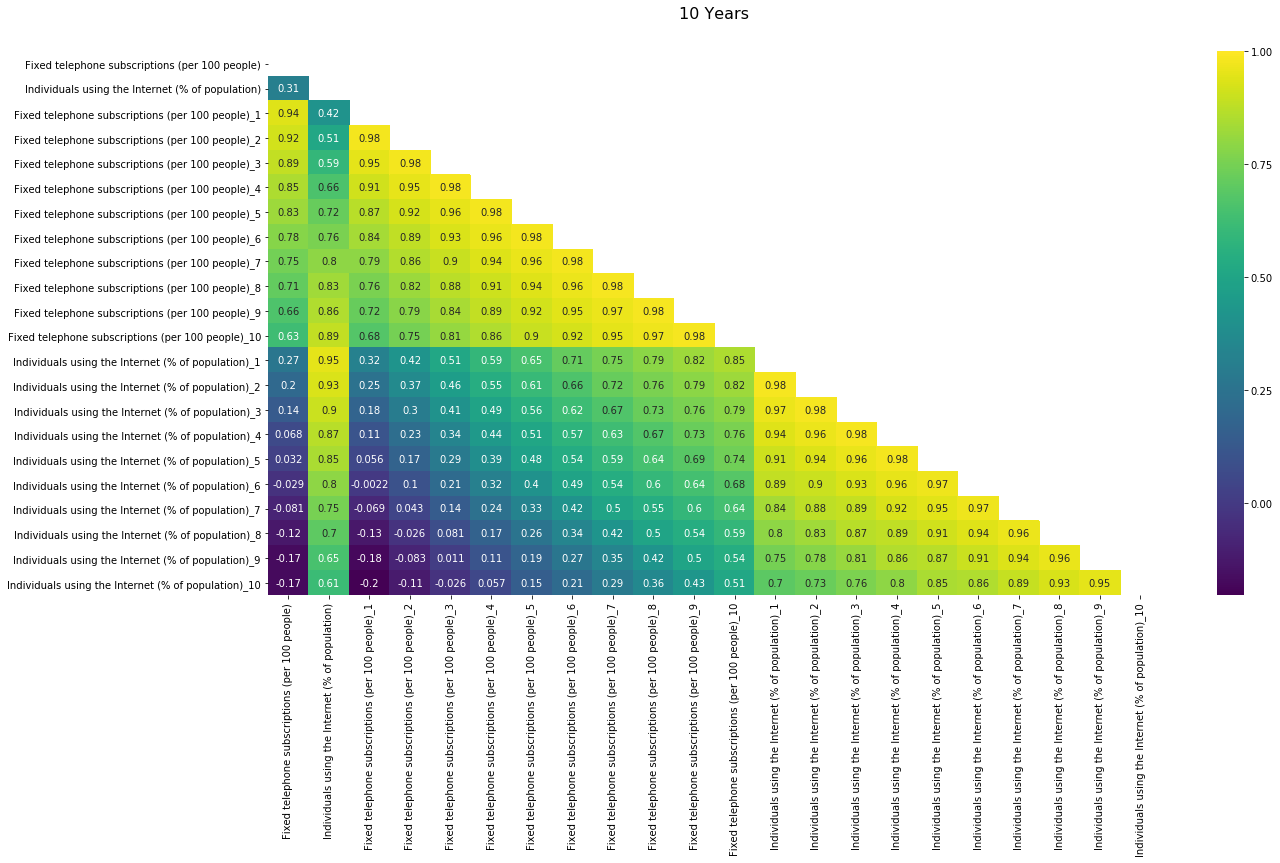

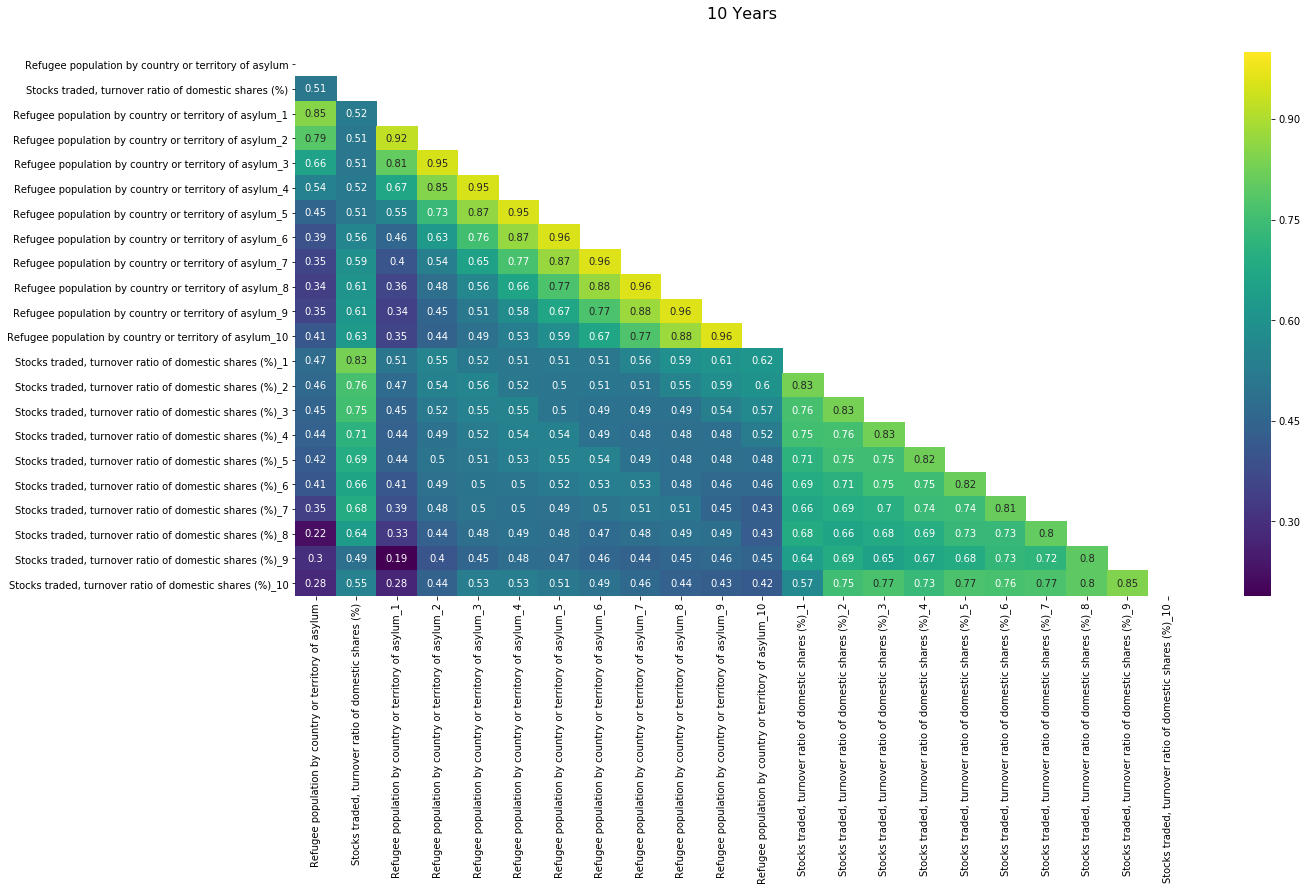

In [20]:
NON_DER = ['Year',]
df_new = df_derived_by_shift(df[['Refugee population by country or territory of asylum','Stocks traded, turnover ratio of domestic shares (%)']], 10, NON_DER)

df_new = df_new.dropna()

colormap = plt.cm.RdBu
plt.figure(figsize=(20,10))
plt.title(u'10 Years', y=1.05, size=16)

mask = np.zeros_like(df_new.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(df_new.corr(), mask=mask, cmap='viridis', annot=True)

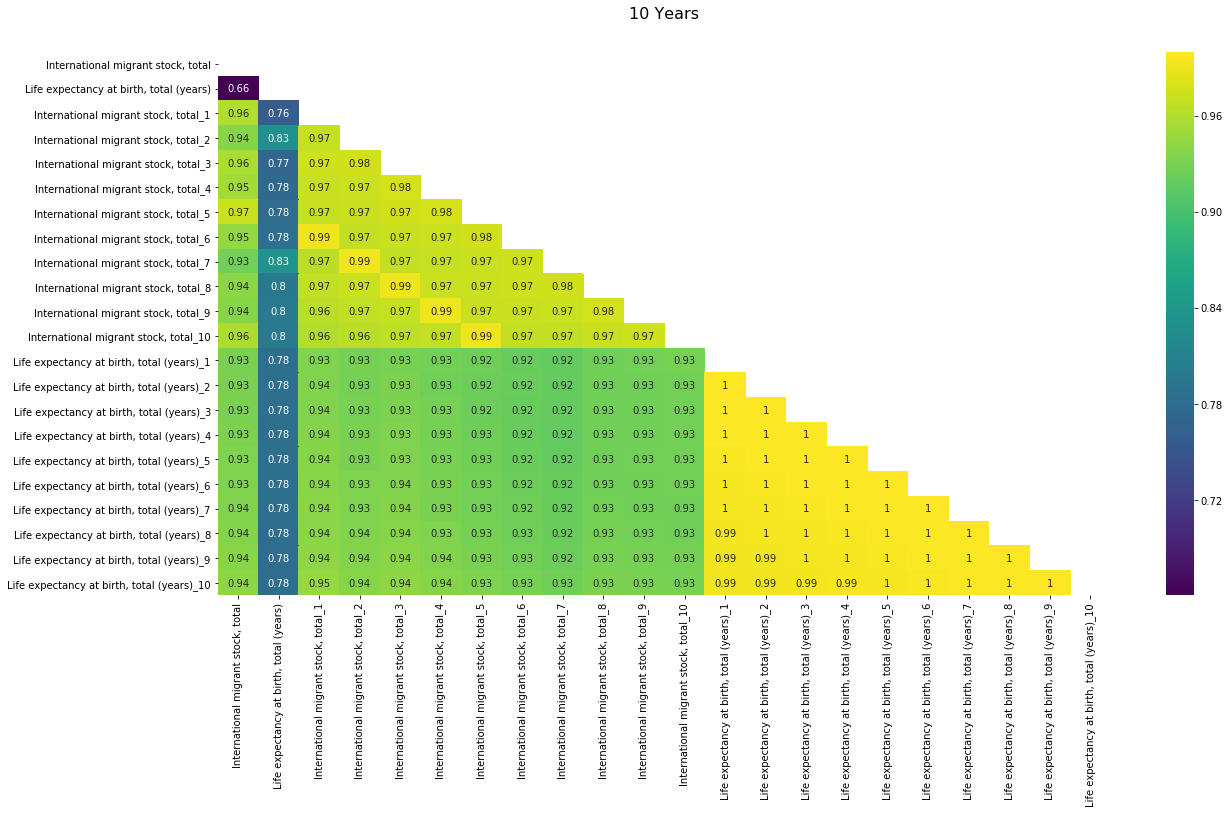